**BSP 2024-2025/1**

**Total of 15 marks**

**Names/Neptun Codes:**

**Marks attained for this part of the homework will count towards your final grade.**

**To attain (full) marks for a question, any answer that includes images or a piece of knowledge, which should be referenced/cited, needs to highlight the source (book, article or web address). You are encouraged to help each other, but identical solutions will not be graded.**

**Write your codes to this document for the full marks. Rename the document to: BSP_REP01_NEPTUNCODES_FULL_NAMES**

## Task 1 - Methods for Measuring Blood Pressure
(6 point)

Choose one method for measuring blood pressure. At the next lab, all teams will present their chosen method. (Please upload the presentation before the start of the next lab)

    1. Right heart catheterization
    2. Auscultatory method with sphygmomanometers
    3. Wrist/arm cuff oscillatory method
    4. Trans-thoracic echocardiogram
    5. Volume clamp with PPG
    6. T-line system with applanation tonometry

## Task 2 - FitzHugh-Nagumo Model
(6 point)

Read this [Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html) about how to solve higher order differential equations in SciPy.

The FitzHugh-Nagumo model is described by the following system of differential equations:

$$
\dot{V} = V - \frac{V^3}{3} - W + I
$$

$$
\dot{W} = 0.08(V + a - bW)
$$

where:
- \( V \) is the membrane potential
- \( W \) is a recovery variable
- \( I \) is the magnitude of the stimulus current

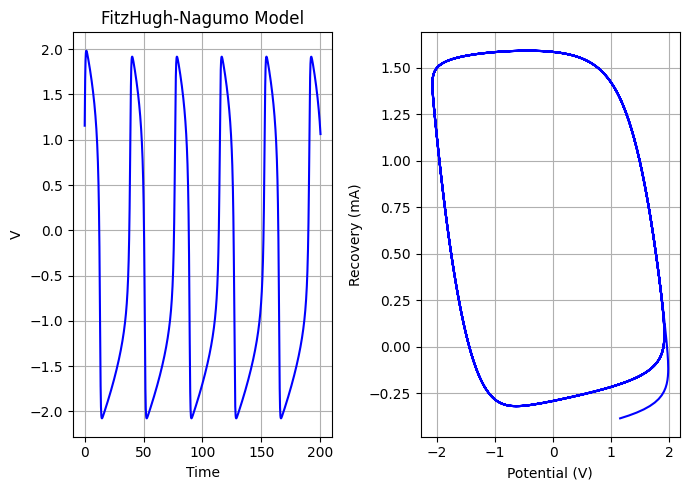

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

def solve_fitzhugh_nagumo(a=0.6, b=0.1, I=0.5, t0=0, tmax=200, dt=0.1, v0=1.0, w0=-0.4, skip_transient=0):
    def fitzhugh_nagumo(t, y):
        V, W = y
        dV_dt = V - (V**3) / 3 - W + I
        dW_dt = 0.08 * (V + a - b * W)
        return [dV_dt, dW_dt]
    
    solver = ode(fitzhugh_nagumo).set_integrator('dopri5')
    solver.set_initial_value([v0, w0], t0)

    t_values, V_values, W_values = [], [], []
    
    while solver.successful() and solver.t < tmax:
        solver.integrate(solver.t + dt)
        t_values.append(solver.t)
        V_values.append(solver.y[0])
        W_values.append(solver.y[1])
    skip_transient = int(skip_transient/dt)
    return np.array(t_values)[skip_transient:], np.array(V_values)[skip_transient:], np.array(W_values)[skip_transient:]


t_values, V_values, W_values = solve_fitzhugh_nagumo()
plt.figure(figsize=(7, 5))

plt.subplot(1, 2, 1)
plt.plot(t_values, V_values, label='V (membrane potential)', color='b')
plt.xlabel('Time')
plt.ylabel('V')
plt.title('FitzHugh-Nagumo Model')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(V_values, W_values, color='b')
plt.xlabel('Potential (V)')
plt.ylabel('Recovery (mA)')
plt.grid(True)


plt.tight_layout()
plt.show()

a)	Solve the differential equation using ode. Find parameters a,b,I,V0,W0 resulting in a spike train (you can find some examples on [Wikipedia](https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model)). Plot the timeline and the phase plot obtained. You should get something similar: Do not forget to paste your code too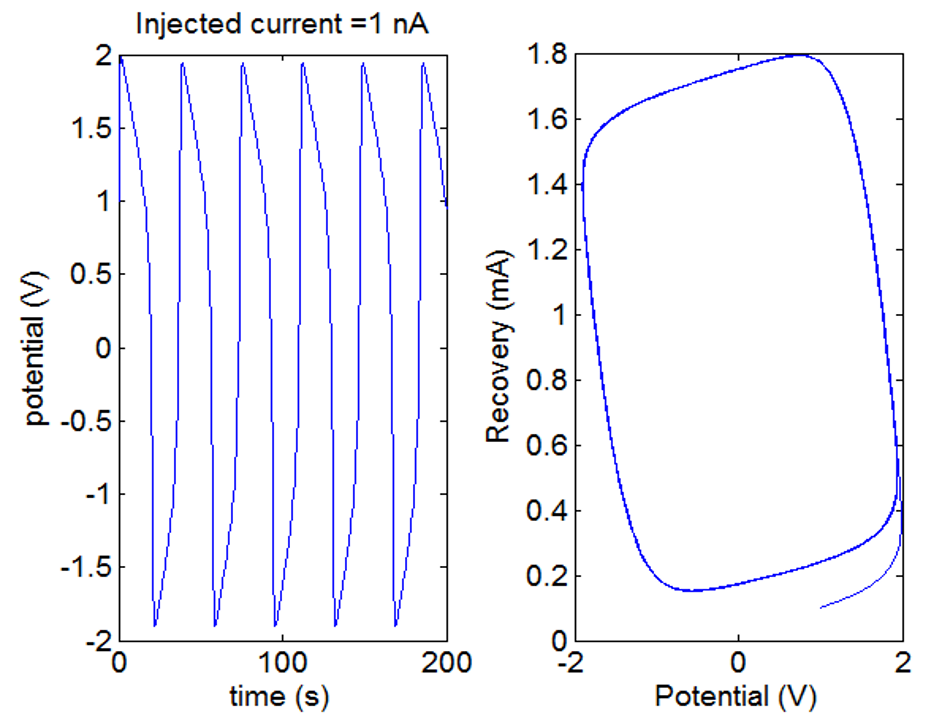


b)	Download the first 10s of the signals raw/a1t09 and raw/a2t01 from the [Squid Giant Axon Membrane Potential (sgamp) database](https://physionet.org/content/sgamp/1.0.0/).

Plot them (membrane voltage and injected current) in Python. What is the main, visible difference between the 2 recordings?

A: while the voltage of a1t09 follows a pattern very similar to the FitzHugh-Nagumo Model, a2t01 is completely different. As for the current, both signals are quite noise and thus difficult to compare.


In [2]:
from scipy.io import loadmat

# File names are in the form aXtY, where X is the axon number and Y is the trial number for that axon.
# Each record lasts in the order of several seconds and is sampled at 125KHz.
stimulation_start=200000
n1=5000
n2=2500000
a1t09m_voltage = (loadmat('a1t09m_voltage.mat')['val'][0, stimulation_start:stimulation_start+n1]*0.1)
a1t09m_current = (loadmat('a1t09m_current.mat')['val'][0, stimulation_start:stimulation_start+n1]+2566)*5/22129.2056	
a2t01m_voltage = (loadmat('a2t01m_voltage.mat')['val'][0, stimulation_start:stimulation_start+n2]*0.1)
a2t01m_current = (loadmat('a2t01m_current.mat')['val'][0, stimulation_start:stimulation_start+n2]+3287)*5/173739.3294	

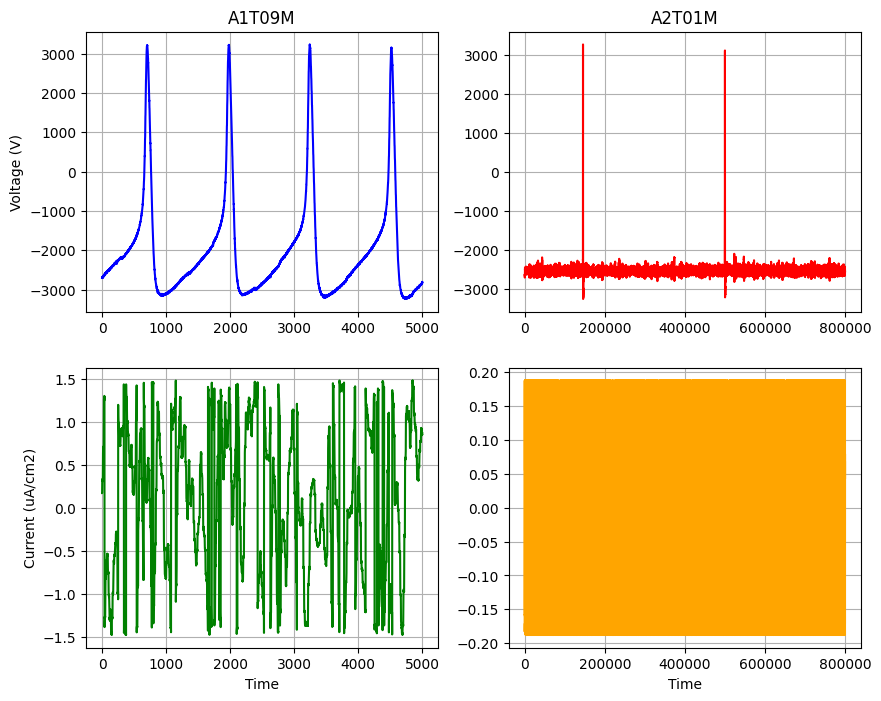

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(a1t09m_voltage, color='blue')
axs[0, 0].set_title('A1T09M')
axs[0, 0].set_ylabel('Voltage (V)')
axs[0, 0].grid(True)

axs[0, 1].plot(a2t01m_voltage, color='red')
axs[0, 1].set_title('A2T01M')
axs[0, 1].grid(True)

axs[1, 0].plot(a1t09m_current, color='green')
axs[1, 0].set_ylabel('Current (uA/cm2)')
axs[1, 0].set_xlabel('Time')
axs[1, 0].grid(True)

axs[1, 1].plot(a2t01m_current, color='orange')
axs[1, 1].set_xlabel('Time')
axs[1, 1].grid(True)

# We can see that signal 2 have much lower injected current
# As a result, the firing frequency is much lower

c)	Try to simulate this difference with your Fitzhug-Nagumo model. Show your results, and explain, which model did better.

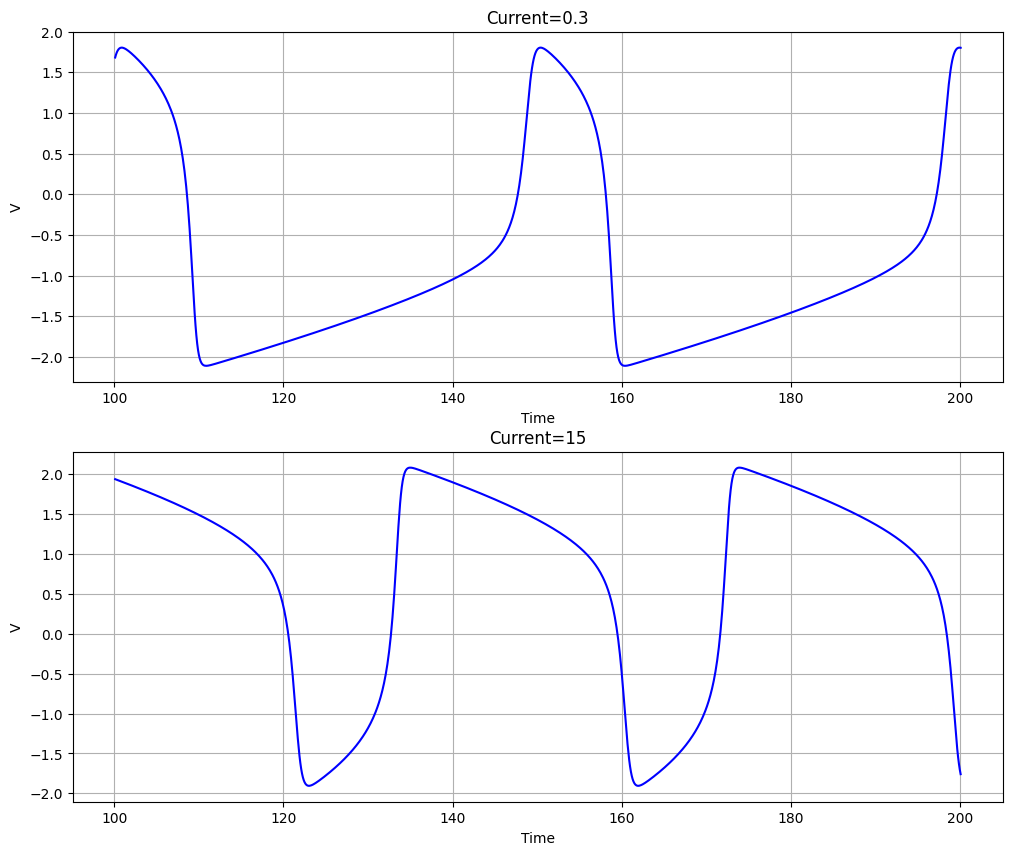

In [4]:
# For the same parameters, the frequency is higher with a higher injected current
t_values, V_values, W_values = solve_fitzhugh_nagumo(0.9, 0.1, 0.3, tmax=200, v0=0, w0=0, skip_transient=100)
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(t_values, V_values, label='V (membrane potential)', color='b')
plt.xlabel('Time')
plt.ylabel('V')
plt.title('Current=0.3')
plt.grid(True)


t_values, V_values, W_values = solve_fitzhugh_nagumo(0.9, 0.1, 15, tmax=200, v0=0, w0=0, skip_transient=100)

plt.subplot(2, 1, 2)
plt.plot(t_values[0:], V_values[0:], label='V (membrane potential)', color='b')
plt.xlabel('Time')
plt.ylabel('V')
plt.title('Current=15')
plt.grid(True)

## TASK 3
(3 point)

The following differential equation is given, where x is the input and y is the output:

$$
\ddot{y} + 2ab\dot{y} + b^2y = c\ddot{x}
$$

In the case of discrete systems the derivative will not be the tangential of the curve, but the steepness of the
line connecting the discrete points (difference of the values divided by the time-difference, T).

For a discrete function $z_n$, the approximations for first and second derivatives are:

1. **First-Order Difference:**

   The first derivative $\dot{z_n}$ is:

   $$
   \dot{z_n} = \frac{z_{n+1} - z_{n-1}}{2T}
   $$

2. **Second-Order Difference:**

   The second derivative $\ddot{z_n}$ is:

   $$
   \ddot{z_n} = \frac{\frac{z_{n+1} - z_n}{T} - \frac{z_n - z_{n-1}}{T}}{T}
   $$

   Simplifying, this becomes:

   $$
   \ddot{z_n} = \frac{z_{n+1} - 2z_n + z_{n-1}}{T^2}
   $$


a, Substitute these formulas into the equation above, and multiply it by $T^2$.
$$
\frac{y_{n+1} - 2y_n + y_{n-1}}{T^2} + 2ab\frac{y_{n+1} - y_{n-1}}{2T} + b^2y(n) = c\frac{x_{n+1} - 2x_n + x_{n-1}}{T^2}
$$

$$
y_{n+1} - 2y_n + y_{n-1} + abT(y_{n+1} - y_{n-1}) + b^2T^2y(n) = c(x_{n+1} - 2x_n + x_{n-1})
$$

b, Write the difference equation in the form of polynomials, such that:

$$
\alpha \cdot Y = \beta \cdot X
$$

where:
- $\alpha$ and $\beta$ are row vectors of coefficients.
- $Y$ and $X$ are column vectors defined as follows:

  - $Y = \begin{bmatrix}
    y_{n+1} \\
    y_n \\
    y_{n-1}
  \end{bmatrix}$

  - $X = \begin{bmatrix}
    x_{n+1} \\
    x_n \\
    x_{n-1}
  \end{bmatrix}$

***What is a transfer function of this system?***

given:

coeficients $\alpha$ = $\left[1+abT, b^2T^2-2,1-abT\right]$

coeficients $\beta$ = $\left[c, -2c, c\right]$

then the transfer function is:

$H(z) = \frac{c -2cz^{-1} + cz^{-2}}{(1+abT) + (b^2T^2-2)z^{-1} + (1-abT)z^{-2}}$


c) 	In **SkyPy** the command *y = lfilter(b_coeff,a_coeff,x)* can solve you this difference equation.  Our input,  x will be a step function.
Complete  the following snippet of code with the right a and b. What biomedical signal does this curve resemble?

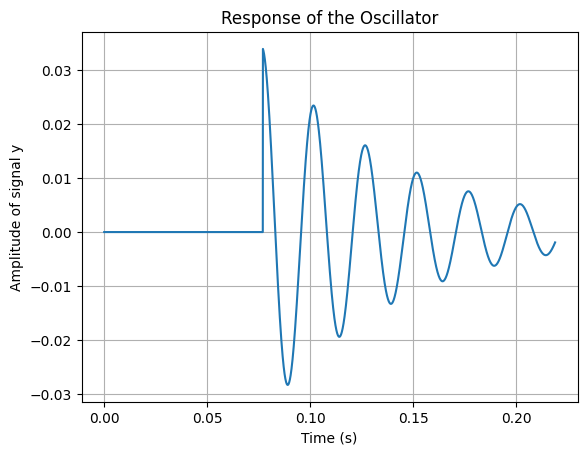

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Parameters
fs = 16e3  # Sampling frequency in Hz
f0 = 40   # Resonant frequency
w0 = 2 * np.pi * f0  # Resonant angular frequency
zeta = 0.06    # Damping factor
G = 0.034      # Gain
T = 1 / fs # Sampling period in s
t = np.linspace(0, 3501 / fs, 3501) # Time of observation
tau = 0.077 # Time at which step occurs

# Input
x = np.double(t > tau)  # Step input

# Transfer function coefficients
a_coeff = [1+zeta*w0*T, w0**2*T**2 - 2, 1-zeta*w0*T]
b_coeff = [G, -2*G, G]

# Apply filter
y = lfilter(b_coeff, a_coeff, x)

# Plot the response
plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude of signal y')
plt.title('Response of the Oscillator')
plt.grid(True)
plt.show()

In signal.mat you can find such a signal (structure field signal) and the relating sampling frequency (fs). Find parameters a,b,c and \tau that return a waveform that best matches this signal. You should get a normalised cross-correlation (NXC) of at least 0.6 between the two.

Use the following code snippet to help you:

0.550095919470847


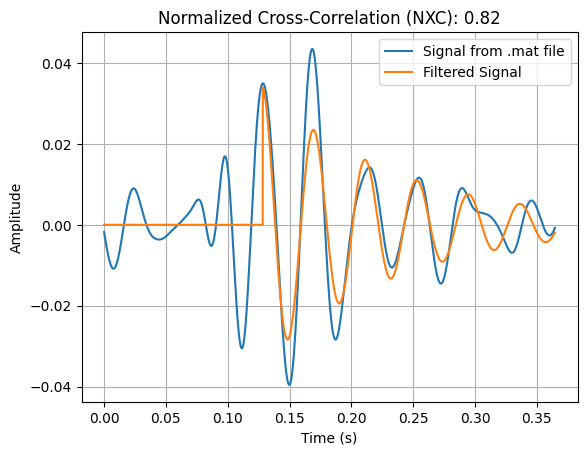

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import norm

# Load the .mat file
mat_data = loadmat('signal.mat')
fs_hrt = mat_data['fs'][0, 0]  # Sampling frequency
y_hrt = mat_data['signal'].flatten()  # Signal

# Time vector for the loaded signal
t_hrt = np.linspace(0, len(y_hrt) / fs_hrt, len(y_hrt))

# Calculate normalized cross-correlation (NXC)
print(norm(y))
NXC = norm(np.sum(y * y_hrt)) / (norm(y) * norm(y_hrt))

# Plot the signals
plt.figure()
plt.plot(t_hrt, y_hrt, label='Signal from .mat file')
plt.plot(np.linspace(0, len(y) / fs_hrt, len(y)), y, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Normalized Cross-Correlation (NXC): {NXC:.2f}')
plt.legend()
plt.grid(True)
plt.show()


Paste below the figure you get, and the parameters you used to generate it. Comment on the parameters you get, and what type of oscillator these define. You are also encouraged to upload an image of the obtained signal and correlation to the forum, so you can help each other, to find the best result.